In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#plt.style.use('ggplot')
#plt.rcParams['grid.linestyle'] = '--'

%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Analisi esplorativa

In [2]:
df = pd.read_csv('data/data02.csv', low_memory=False, index_col=0)
df

,at,v,ap,rh,pe
0,8.34,40.77,1010.84000,90.01,480.48
1,29.74,56.90,1007.15000,41.91,438.76
2,19.07,49.69,1007.22000,76.79,453.09
3,11.80,40.66,1017.13000,97.20,464.43
4,13.97,39.16,1016.05000,84.60,470.96
5,22.10,71.29,1008.20000,75.38,442.35
6,14.47,41.76,1021.98000,78.41,464.00
7,31.25,69.51,1010.25000,36.83,428.77
8,6.77,38.18,1017.80000,81.13,484.31
9,28.28,68.67,1006.36000,69.90,435.29


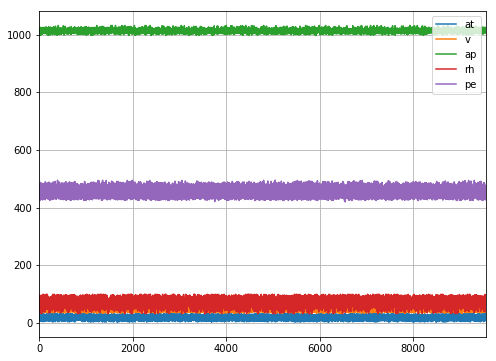

In [3]:
ax=df.plot(figsize=(8,6), grid=True);

A prima vista dal grafico e tenendo in considerazione che i segnali del dataset rappresentano delle grandezze fisiche sembrerebbe che abbiamo a che fare con un problema di serie temporali e di conseguenza di dati non iid, per cui occorre tenere presente tutta una serie di operazioni specifiche per trattare al meglio le serie temporali.

Verifichiamo che ciò sia vero, cioè utilizziamo degli strumenti di analisi sia visiva sia quantitativa per verificare che effettivamente i segnali siano non iid e nel caso fossero effettivamente serie temporali calcoliamone delle misure specifiche come autocorrelazione, autocorrelazione parziale....

La metodologia più banale per quantificare l'autocorrelazione di un segnale con esso stesso ritardato di un fattore $\tau$ è quella di plottare insieme e quantificarne la correlazione.

In [6]:
def plot_lags(y):    
    lags=9

    ncols=3
    nrows=int(np.ceil(lags/ncols))

    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 4*nrows))

    for ax, lag in zip(axes.flat, np.arange(1,lags+1, 1)):
        lag_str = 't-{}'.format(lag)
        X = (pd.concat([y, y.shift(-lag)], axis=1,
                       keys=['y'] + [lag_str]).dropna())

        X.plot(ax=ax, kind='scatter', y='y', x=lag_str);
        corr = X.corr().values[0][1]
        ax.set_ylabel('Original')
        ax.set_title('Lag: {} (corr={:.2f})'.format(lag_str, corr));
        ax.set_aspect('equal');
        ax.grid(True,linestyle='--')
        sns.despine();

    fig.tight_layout();

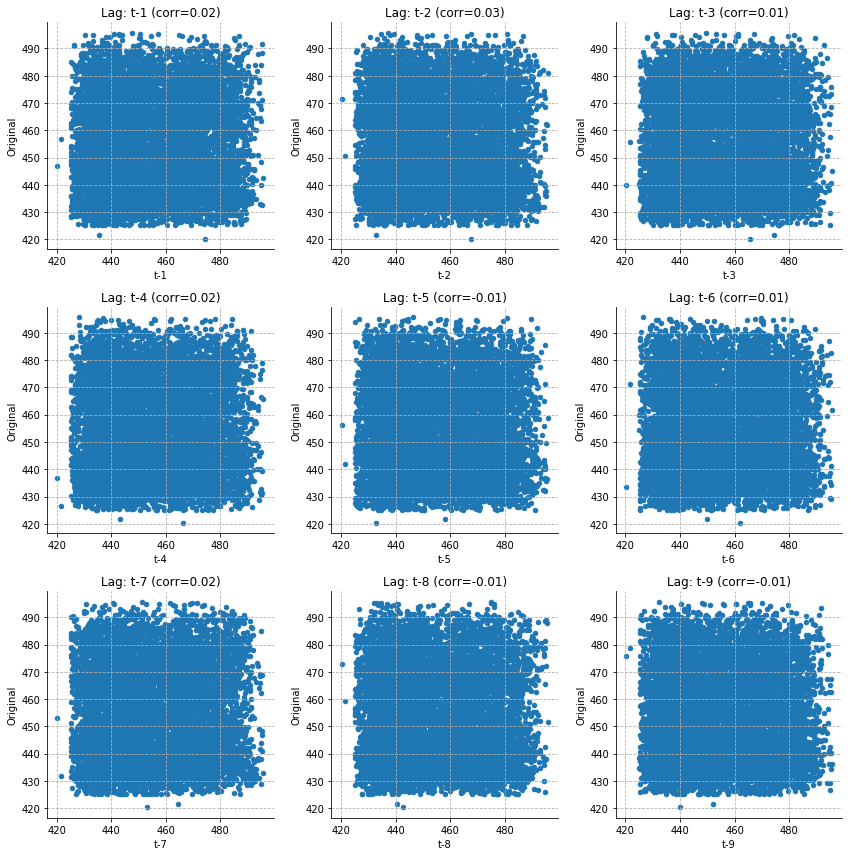

In [7]:
plot_lags(df.pe);

#### Dai grafici si osserva che la target pe non è correlata in maniera significativa con essa stessa al passato (ha le caratteristiche di un white noise a media non nulla), ciò ha come spiegazione più probabile il fatto che tale segnale non sia una serie temporale misurata fisicamente ma che sia in realtà un segnale prodotto artificialmente, inoltre data la sua natura iid è possibile affermare che tale target sia ottenuta come combinazione dei segnali di input i quali molto probabilmente sono segnali rumorosi iid prodotti artificialmente.

####  Un'altra spiegazione meno probabile è che i dati siano stati mischiati a posteriori in modo tale che la dipendenza temporale andasse persa, ma questo scenario è meno probabile del precedente

Verifichiamoquanto affermato sopra con strumenti più avanzati e quantitativi.

Strumenti più avanzati sono il calcolo della funzione di autocorrelazione e della autocorrelazione parziale. 

Per fare questo definiamo una funzione che ci permette di plottare i singoli segnali e osservarli tramite 4 rappresentazioni differenti:

In [11]:
import statsmodels.api as sm
#sns.set(style="whitegrid")
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['axes.grid'] = True

def tsplot(y, lags=None, title='', figsize=(14, 8)):

    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    sm.graphics.tsa.plot_acf(y, lags=lags, ax=acf_ax)
    sm.graphics.tsa.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

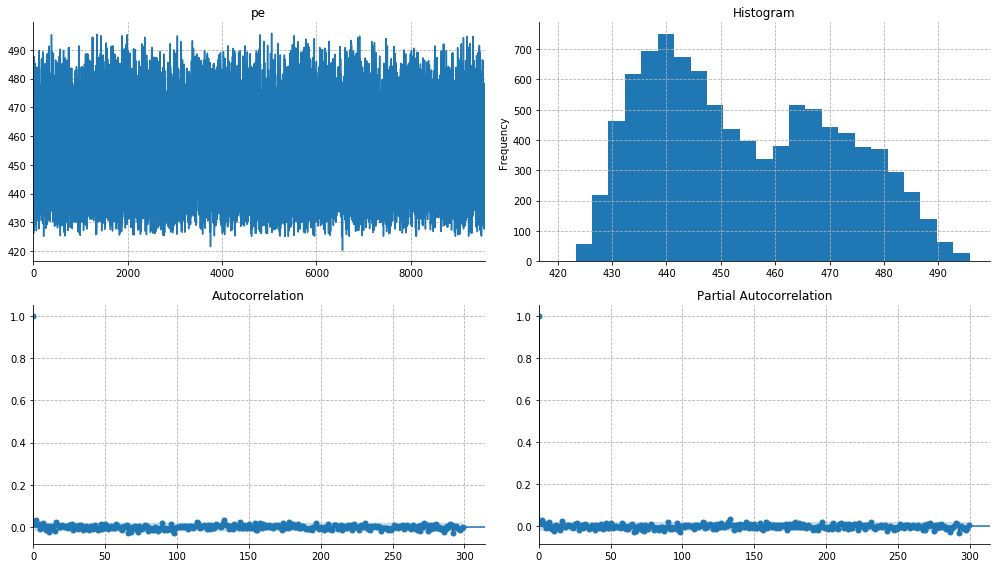

In [14]:
tsplot(df.pe, lags=range(0,300), title='pe');

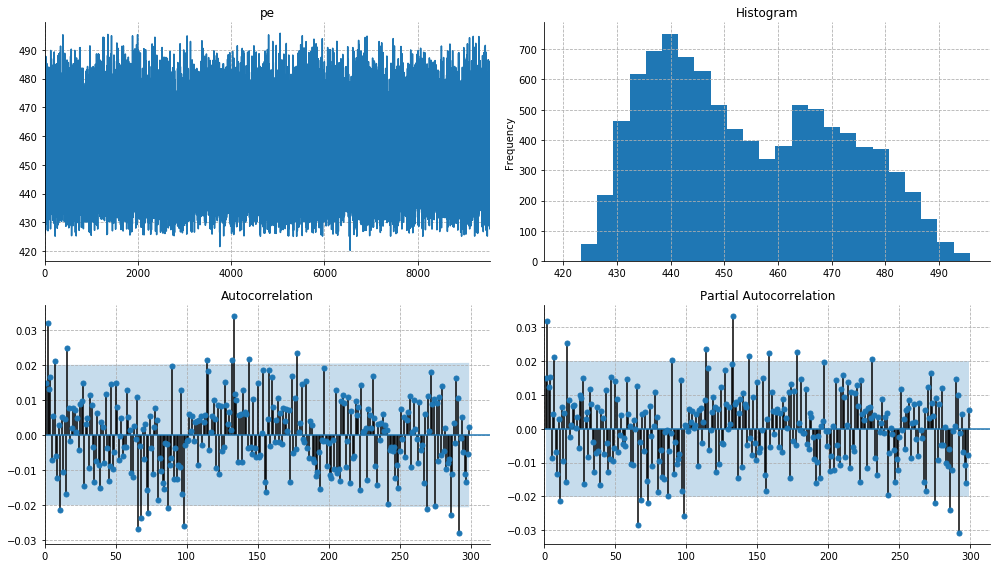

In [15]:
tsplot(df.pe, lags=range(1,300),title='pe');

I grafici soprastanti confermano quanto affermatoin precedenza, i valori di autocorrelazione e autocorrlazione parziale sono prossimi a zero e di consegenza il segnale pe sembra essere un segnale iid.

Vi è corrisponenza (non uguaglianza) tra rumore bianco e segnale iid quindi mi aspetto che se grafico la fft o lo spettro del segnale questo abbia una fft/spettro costantee il grafico sotto effettivamente avvalora la mia ipotesi

In [21]:
def plot_time_freq(t, y, label='Signal'):

    freq = np.fft.fftfreq(t.size,d = t[1]-t[0])
    Y = abs(np.fft.fft(y))
    
    plt.figure(figsize = [15,5])
    plt.subplot(1,2,1)
    plt.plot(t,y)
    plt.title('Time Domain')
    plt.xlabel('Time')
    plt.ylabel(label)
    
    plt.subplot(1,2,2)
    plt.plot(np.fft.fftshift(freq),np.fft.fftshift(Y),'r')
    plt.title('Frequency Domain')
    plt.xlabel('Frequency')
    #plt.xlim(-20, 20)
    plt.ylabel('Absolute FFT')
    plt.grid(True)

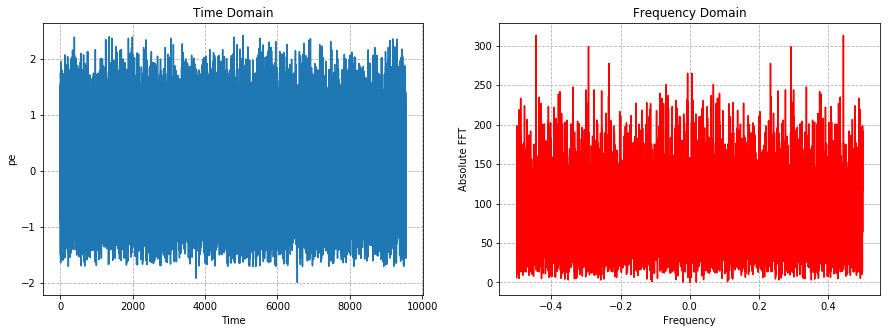

In [22]:
plot_time_freq(df.index,(df.pe-df.pe.mean())/df.pe.std(), label='pe')

Infine utilizzaimo un test statistico in grado di calcolare la correlazione seriale di una serie temporale e in grado di darci la risposta definitiva sul fatto che effettivamente il segnale pe sia iid. 

In [23]:
from statsmodels.stats.stattools import durbin_watson

# Run Durbin-Watson test on the standardized residuals.
# The statistic is approximately equal to 2*(1-r), where r is the sample autocorrelation of the residuals.
# Thus, for r == 0, indicating no serial correlation, the test statistic equals 2.
# This statistic will always be between 0 and 4. The closer to 0 the statistic,
# the more evidence for positive serial correlation. The closer to 4,
# the more evidence for negative serial correlation.

durbin_watson((df.pe-df.pe.mean())/df.pe.std())

1.9697370078052596

il test ci conferma i sospetti, il segnale pe ha valore di test di DW molto prossimo a 2 e di conseguenza abbiamo a che fare con un segnale iid 

Ripetiamo tale analisi per gli altri segnali presenti nel dataset

## at

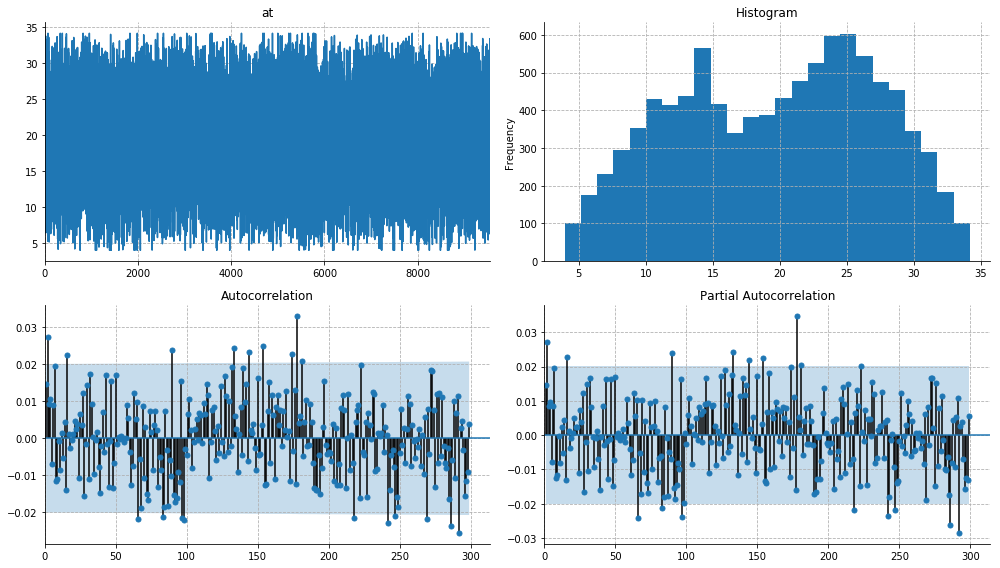

In [24]:
tsplot(df['at'], lags=range(1,300), title='at');

In [25]:
durbin_watson((df['at']-df['at'].mean())/df['at'].std())

1.9702659168002137

## v

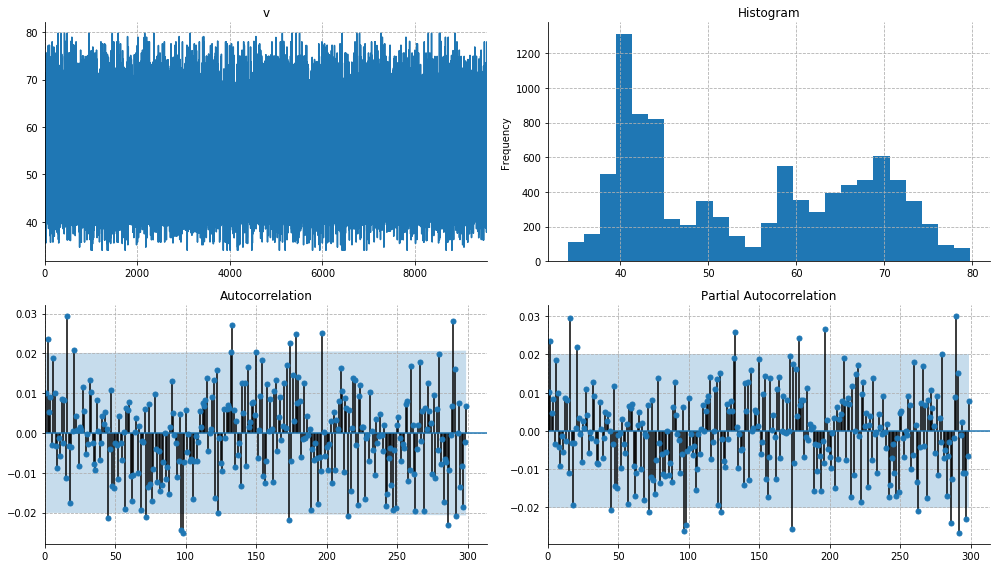

In [26]:
tsplot(df.v, lags=range(1,300), title='v');

In [27]:
durbin_watson((df.v-df.v.mean())/df.v.std())

1.9796518569786017

## ap

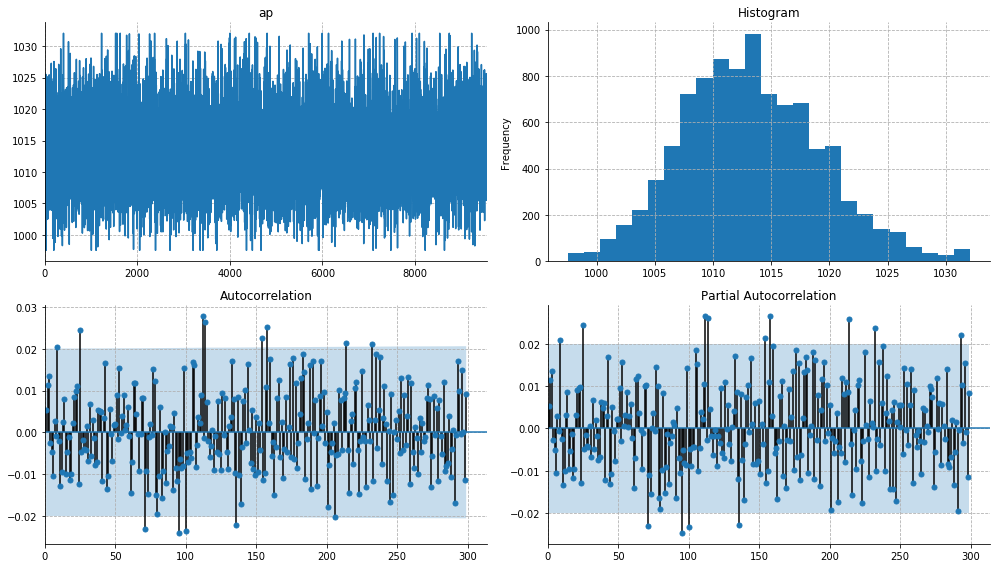

In [28]:
tsplot(df.ap, lags=range(1,300), title='ap');

In [29]:
durbin_watson((df.ap-df.ap.mean())/df.ap.std())

1.9894157629655396

## rh

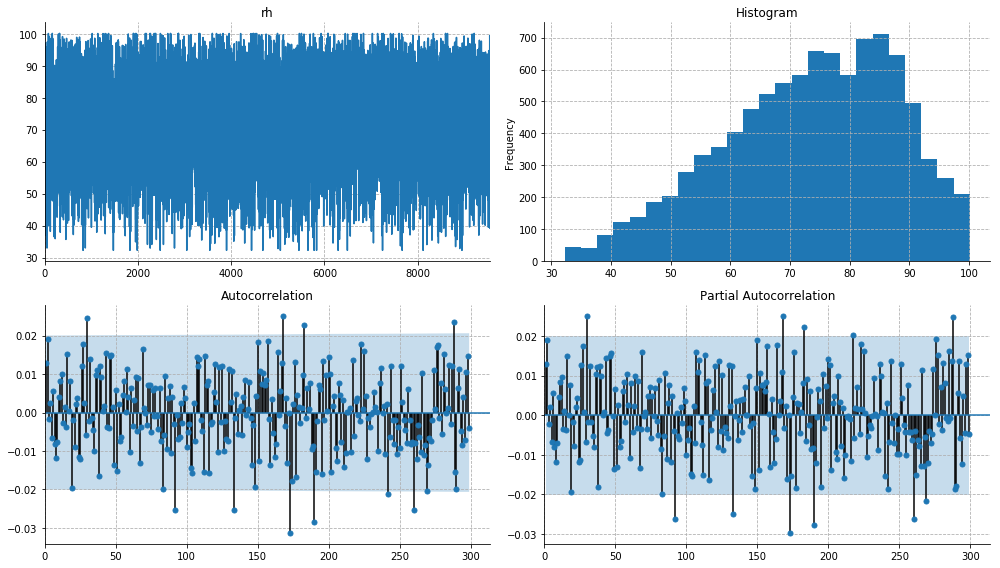

In [31]:
tsplot(df.rh, lags=range(1,300), title='rh');

In [32]:
durbin_watson((df.rh-df.rh.mean())/df.rh.std())

1.97384963024505